In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from src.consts import PATHS
from src.experiments.info_flow import InfoFlowConfig
from src.plots.info_flow_confidence import create_confidence_plot
from src.types import TokenType

Not using causal_conv1d
Not using causal_conv1d
Not using causal_conv1d


In [3]:
PATHS.PROJECT_DIR = Path(
    "/home/yandex/DL20232024a/nirendy/repos/ssm_analysis/tests/src/experiments/baselines/full_pipeline"
)

In [4]:
config = InfoFlowConfig(
    window_size=15,
    variation="test_baseline",
)
target = TokenType.last
with_fixed_limits = False
data = config.get_block_target_outputs(target)
data = {
    d: v
    for d, v in data.items()
    # if not isinstance(d, tuple)
    # if isinstance(d, tuple)
}

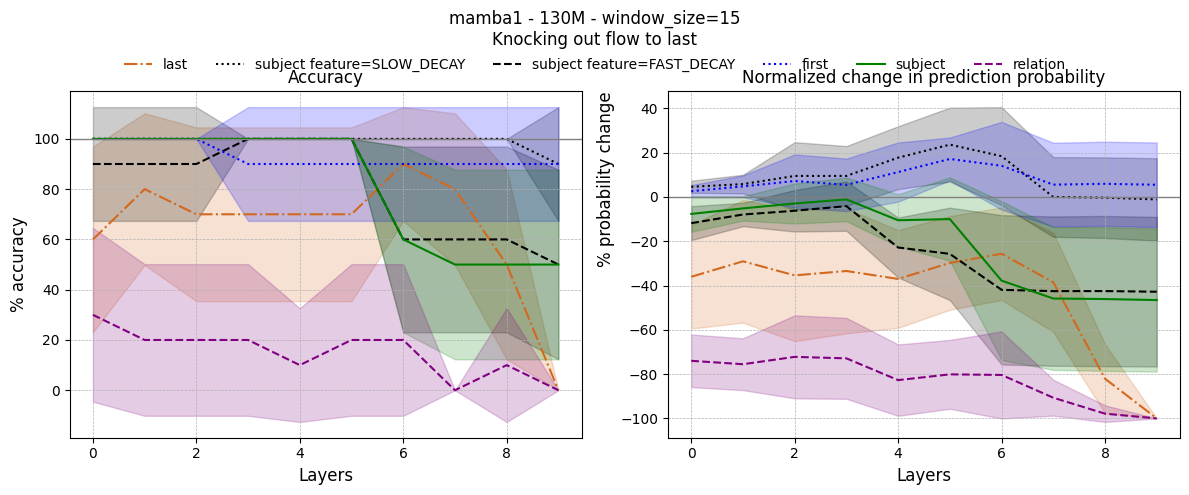

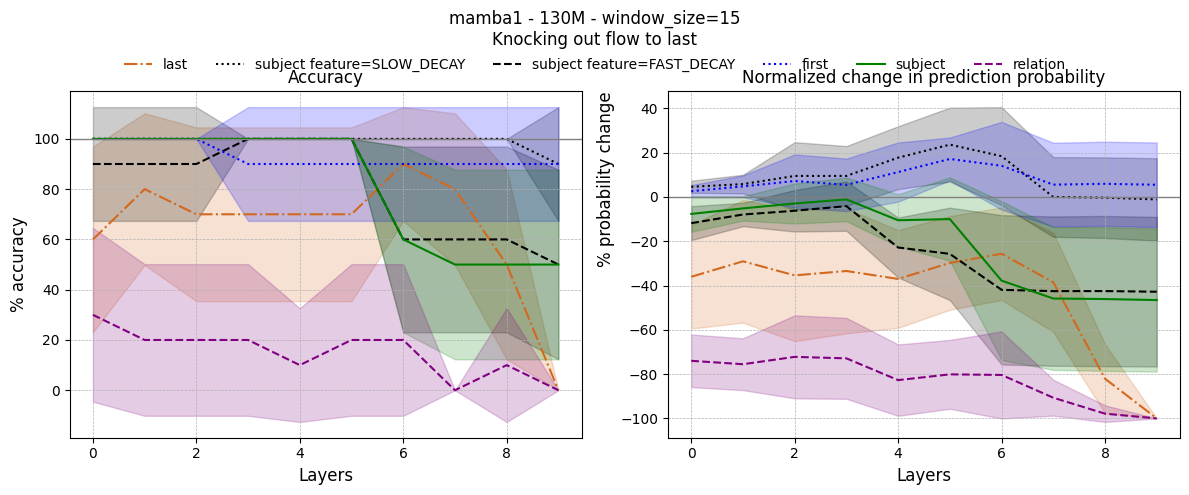

In [20]:
create_confidence_plot(
    targets_window_outputs=data,
    confidence_level=0.95,
    title=(
        f"{config.model_arch} - {config.model_size} - window_size={config.window_size}"
        + f"\nKnocking out flow to {target}"
    ),
    plots_meta_data={
        "acc": {
            "title": "Accuracy",
            "ylabel": "% accuracy",
            "ylabel_loc": "center",
            "axhline_value": 100.0,
            "ylim": (60.0, 105.0) if with_fixed_limits else None,
        },
        "diff": {
            "title": "Normalized change in prediction probability",
            "ylabel": "% probability change",
            "ylabel_loc": "top",
            "axhline_value": 0.0,
            "ylim": (-50.0, 50.0) if with_fixed_limits else None,
        },
    },
)